### 載入工具

In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### 資料：訓練集、標籤集

(6, 1)


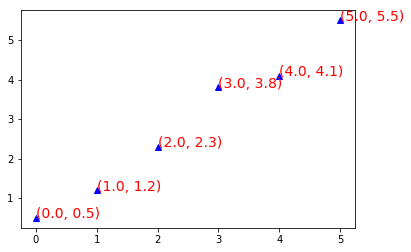

In [29]:
x_train = np.array([[0], [1], [2], [3], [4], [5]], np.float32)
y_train = np.array([[0.5], [1.2], [2.3], [3.8], [4.1], [5.5]], np.float32)

plt.figure()
plt.plot(x_train, y_train, "b^")
txt = [0, 1, 2, 3, 4, 5]
print(x_train.shape)
for i in range(x_train.shape[0]):
    plt.text(x_train[i][0], y_train[i][0], '(%.1f' % x_train[i][0] + ', %.1f)' % y_train[i][0], 
             fontdict={'size': 14, 'color': 'red'})


### 建構 Tensorflow 的 Graph

In [32]:
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

hypothesis = tf.layers.dense(inputs=x, units=1)
cost = tf.losses.mean_squared_error(labels=y, predictions=hypothesis)
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### 創建 Session、初始變數、開始訓練

cost:  8.871657


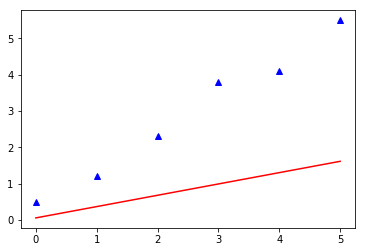

cost:  0.056191277


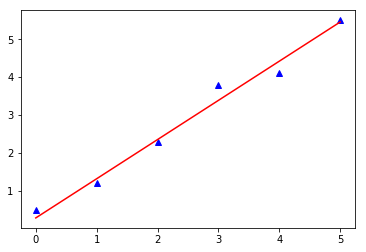

cost:  0.0548707


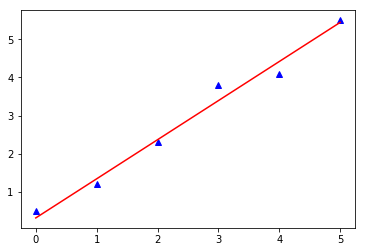

cost:  0.054140657


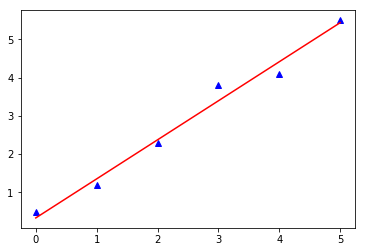

cost:  0.05373709


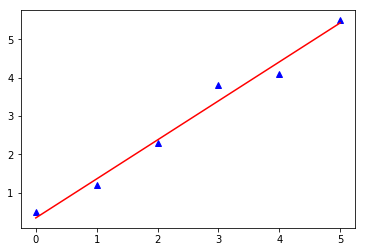

cost:  0.053513955


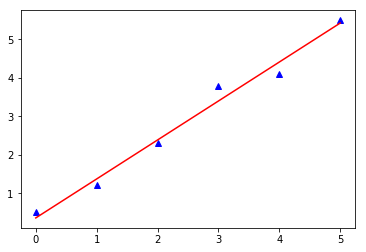

cost:  0.05339058


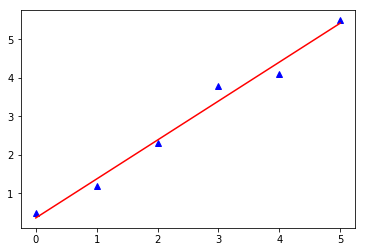

cost:  0.053322375


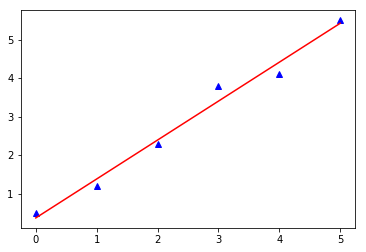

cost:  0.05328469


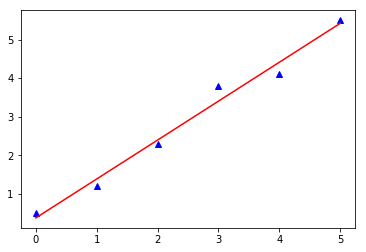

cost:  0.053263873


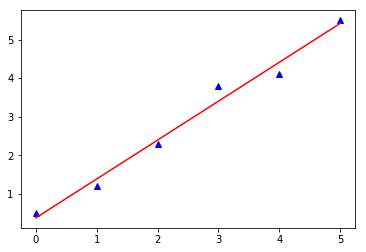

In [34]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(500):
    c_ , _ = sess.run([cost, train], feed_dict={x:x_train, y:y_train})
    if step%50 == 0:
        print("cost: ", c_)
        x_draw = np.linspace(0, 5, 100)[:,np.newaxis]
        y_draw = sess.run(hypothesis, feed_dict={x:x_draw})
        plt.cla()
        plt.plot(x_train, y_train, "b^")
        plt.plot(x_draw, y_draw, "r-")
        plt.pause(0.1)

## 預測新資料

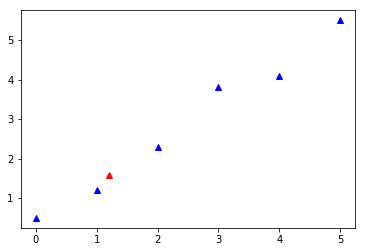

In [35]:
x_new = [[1.2]]
y_new = sess.run(hypothesis, feed_dict={x:x_new})

plt.cla()
plt.plot(x_train, y_train, "b^")
plt.plot(x_new, y_new, "r^")
plt.show()